<a href="https://colab.research.google.com/github/GiPaiva/Interpolacao/blob/main/EP_CN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Integrantes: Giovanna Paiva Alves e Matheus Sanchez Duda

# Parte 1: Sistemas Lineares

Implementação:

---------
Implemente em Python as seguintes funções:

eliminacao_gaussiana(A, b) : Eliminação Gaussiana com pivoteamento parcial.

jacobi(A, b, x0, tol, max_iter) : Método de Jacobi.

gauss_seidel(A, b, x0, tol, max_iter) : Método de Gauss-Seidel.

------------
Considerando que:

A é a matriz dos coeficientes.

b é o vetor de termos independentes.

x0 é o chute inicial (para métodos iterativos).

tol é a tolerância para o critério de parada (norma do resíduo).

max_iter é o número máximo de iterações.

--------
Geração de Sistemas:

Gere três sistemas lineares Ax = b de tamanhos diferentes (ex: n = 5, 50, 500).

--------
Restrições:

As matrizes A devem ser não singulares (determinante diferente de zero).

Para os métodos iterativos, as matrizes A devem ser diagonalmente dominantes (ou garantir que os métodos convirjam).

---------
Resolução e Análise:

Para cada sistema linear:

Resolva o sistema usando eliminacao_gaussiana.

Resolva o sistema usando jacobi (se a matriz for diagonalmente dominante).

Resolva o sistema usando gauss_seidel (se a matriz for diagonalmente
dominante).

Use como chute inicial x0 um vetor de zeros.

Use tol = 1e-6 e max_iter = 1000.

Compare os resultados dos métodos (direto e iterativos): tempo de execução, precisão da solução (comparar com numpy.linalg.solve apenas para verificação), número de iterações (para métodos iterativos).

In [1]:
import numpy as np
import time

def eliminacao_gaussiana(A, b):
    """
    Implementação da Eliminação Gaussiana com pivoteamento parcial.

    Parâmetros:
    A: matriz dos coeficientes (np.array)
    b: vetor de termos independentes (np.array)

    Retorna:
    x: solução do sistema (np.array)
    """
    # Cria cópias de A e b para não modificar os originais
    A = A.copy().astype(float)
    b = b.copy().astype(float)
    n = len(b)

    # Combinamos A e b para facilitar as operações
    Ab = np.column_stack((A, b))

    # Eliminação progressiva com pivoteamento parcial
    for i in range(n):
        # Pivoteamento parcial (encontra o pivô máximo na coluna atual)
        max_row = i + np.argmax(abs(Ab[i:, i]))
        if max_row != i:
            Ab[[i, max_row]] = Ab[[max_row, i]]  # Troca linhas

        # Verificar se a matriz é singular (pivô próximo de zero)
        if abs(Ab[i, i]) < 1e-10:
            raise ValueError("Matriz singular ou mal condicionada")

        # Eliminação dos elementos abaixo do pivô
        for j in range(i + 1, n):
            fator = Ab[j, i] / Ab[i, i]
            Ab[j, i:] = Ab[j, i:] - fator * Ab[i, i:]

    # Substituição regressiva
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = (Ab[i, -1] - np.sum(Ab[i, i+1:n] * x[i+1:])) / Ab[i, i]

    return x

def jacobi(A, b, x0, tol, max_iter):
    """
    Implementação do método iterativo de Jacobi.

    Parâmetros:
    A: matriz dos coeficientes (np.array)
    b: vetor de termos independentes (np.array)
    x0: chute inicial (np.array)
    tol: tolerância para critério de parada (float)
    max_iter: número máximo de iterações (int)

    Retorna:
    x: solução do sistema (np.array)
    iter_count: número de iterações realizadas (int)
    residuos: lista de resíduos em cada iteração (list)
    """
    A = A.astype(float)
    b = b.astype(float)
    x = x0.copy().astype(float)
    n = len(b)

    # Verificar se a diagonal principal não contém zeros
    for i in range(n):
        if abs(A[i, i]) < 1e-10:
            raise ValueError("Elemento diagonal próximo de zero. Método de Jacobi pode não convergir.")

    # Extrair diagonal D e restante R tal que A = D + R
    D = np.diag(np.diag(A))
    R = A - D

    # Calcular D^(-1)
    D_inv = np.diag(1.0 / np.diag(A))

    iter_count = 0
    residuos = []

    while iter_count < max_iter:
        # Nova aproximação: x^(k+1) = D^(-1) * (b - R * x^(k))
        x_novo = D_inv @ (b - R @ x)

        # Cálculo do resíduo
        residuo = np.linalg.norm(b - A @ x_novo) / np.linalg.norm(b)
        residuos.append(residuo)

        # Critério de parada
        if residuo < tol:
            x = x_novo
            iter_count += 1
            break

        x = x_novo
        iter_count += 1

    return x, iter_count, residuos

def gauss_seidel(A, b, x0, tol, max_iter):
    """
    Implementação do método iterativo de Gauss-Seidel.

    Parâmetros:
    A: matriz dos coeficientes (np.array)
    b: vetor de termos independentes (np.array)
    x0: chute inicial (np.array)
    tol: tolerância para critério de parada (float)
    max_iter: número máximo de iterações (int)

    Retorna:
    x: solução do sistema (np.array)
    iter_count: número de iterações realizadas (int)
    residuos: lista de resíduos em cada iteração (list)
    """
    A = A.astype(float)
    b = b.astype(float)
    x = x0.copy().astype(float)
    n = len(b)

    # Verificar se a diagonal principal não contém zeros
    for i in range(n):
        if abs(A[i, i]) < 1e-10:
            raise ValueError("Elemento diagonal próximo de zero. Método de Gauss-Seidel pode não convergir.")

    iter_count = 0
    residuos = []

    while iter_count < max_iter:
        x_antigo = x.copy()

        # Atualização de Gauss-Seidel (elemento por elemento)
        for i in range(n):
            soma1 = np.dot(A[i, :i], x[:i])         # Soma usando valores já atualizados
            soma2 = np.dot(A[i, i+1:], x_antigo[i+1:])  # Soma usando valores antigos
            x[i] = (b[i] - soma1 - soma2) / A[i, i]

        # Cálculo do resíduo
        residuo = np.linalg.norm(b - A @ x) / np.linalg.norm(b)
        residuos.append(residuo)

        # Critério de parada
        if residuo < tol:
            iter_count += 1
            break

        iter_count += 1

    return x, iter_count, residuos

def is_diagonally_dominant(A):
    """
    Verifica se a matriz A é diagonalmente dominante.

    Uma matriz é diagonalmente dominante se, para cada linha,
    o valor absoluto do elemento diagonal é maior ou igual à
    soma dos valores absolutos dos outros elementos da linha.

    Parâmetros:
    A: matriz a ser verificada (np.array)

    Retorna:
    bool: True se a matriz for diagonalmente dominante, False caso contrário
    """
    n = A.shape[0]
    for i in range(n):
        if abs(A[i, i]) < np.sum(np.abs(A[i, :])) - abs(A[i, i]):
            return False
    return True

def gerar_matriz_diagonalmente_dominante(n):
    """
    Gera uma matriz aleatória diagonalmente dominante de tamanho n x n.

    Parâmetros:
    n: dimensão da matriz (int)

    Retorna:
    A: matriz diagonalmente dominante (np.array)
    """
    A = np.random.rand(n, n)

    # Garantir que a matriz seja diagonalmente dominante
    for i in range(n):
        row_sum = np.sum(np.abs(A[i, :])) - np.abs(A[i, i])
        A[i, i] = row_sum + np.random.rand() + 0.5  # Adicionamos um valor positivo para garantir

    return A

def comparar_metodos(n, tol=1e-6, max_iter=1000):
    """
    Compara os métodos de resolução de sistemas para uma matriz de tamanho n x n.

    Parâmetros:
    n: dimensão do sistema (int)
    tol: tolerância para os métodos iterativos (float)
    max_iter: número máximo de iterações (int)

    Retorna:
    resultados: dicionário com os resultados das comparações
    """
    # Gerar matriz diagonalmente dominante
    A = gerar_matriz_diagonalmente_dominante(n)

    # Gerar um vetor solução conhecido para validação
    x_real = np.random.rand(n)

    # Calcular o vetor b
    b = A @ x_real

    # Vetor inicial para métodos iterativos
    x0 = np.zeros(n)

    resultados = {}

    # Usar numpy.linalg.solve para verificação
    start_time = time.perf_counter()
    x_numpy = np.linalg.solve(A, b)
    tempo_numpy = time.perf_counter() - start_time

    resultados['numpy'] = {
        'tempo': tempo_numpy,
        'erro': np.linalg.norm(x_numpy - x_real) / np.linalg.norm(x_real)
    }

    # Eliminação Gaussiana
    start_time = time.perf_counter()
    try:
        x_gauss = eliminacao_gaussiana(A, b)
        tempo_gauss = time.perf_counter() - start_time
        erro_gauss = np.linalg.norm(x_gauss - x_real) / np.linalg.norm(x_real)

        resultados['gaussiana'] = {
            'tempo': tempo_gauss,
            'erro': erro_gauss
        }
    except Exception as e:
        resultados['gaussiana'] = {
            'erro': str(e)
        }

    # Jacobi
    start_time = time.perf_counter()
    try:
        x_jacobi, iter_jacobi, residuos_jacobi = jacobi(A, b, x0, tol, max_iter)
        tempo_jacobi = time.perf_counter() - start_time
        erro_jacobi = np.linalg.norm(x_jacobi - x_real) / np.linalg.norm(x_real)

        resultados['jacobi'] = {
            'tempo': tempo_jacobi,
            'erro': erro_jacobi,
            'iteracoes': iter_jacobi,
            'convergiu': iter_jacobi < max_iter
        }
    except Exception as e:
        resultados['jacobi'] = {
            'erro': str(e)
        }

    # Gauss-Seidel
    start_time = time.perf_counter()
    try:
        x_gs, iter_gs, residuos_gs = gauss_seidel(A, b, x0, tol, max_iter)
        tempo_gs = time.perf_counter() - start_time
        erro_gs = np.linalg.norm(x_gs - x_real) / np.linalg.norm(x_real)

        resultados['gauss_seidel'] = {
            'tempo': tempo_gs,
            'erro': erro_gs,
            'iteracoes': iter_gs,
            'convergiu': iter_gs < max_iter
        }
    except Exception as e:
        resultados['gauss_seidel'] = {
            'erro': str(e)
        }

    return resultados

# Testes para os três tamanhos de sistemas
def executar_testes():
    tamanhos = [5, 50, 500]
    todos_resultados = {}

    for n in tamanhos:
        print(f"\n\nExecutando testes para sistema de tamanho {n}x{n}:")
        todos_resultados[n] = comparar_metodos(n)

        # Exibir resultados
        print("\nturururururururururururururururururururururururururu")
        print(f"Método NumPy:")
        print(f"  Tempo: {todos_resultados[n]['numpy']['tempo']:.6f} segundos")
        print(f"  Erro relativo: {todos_resultados[n]['numpy']['erro']:.6e}")

        print("\nturururururururururururururururururururururururururu")
        print(f"Método Eliminação Gaussiana:")
        if isinstance(todos_resultados[n]['gaussiana'].get('erro'), str):
            print(f"  Erro: {todos_resultados[n]['gaussiana']['erro']}")
        else:
            print(f"  Tempo: {todos_resultados[n]['gaussiana']['tempo']:.6f} segundos")
            print(f"  Erro relativo: {todos_resultados[n]['gaussiana']['erro']:.6e}")

        print("\nturururururururururururururururururururururururururu")
        print(f"Método de Jacobi:")
        if isinstance(todos_resultados[n]['jacobi'].get('erro'), str):
            print(f"  Erro: {todos_resultados[n]['jacobi']['erro']}")
        else:
            print(f"  Tempo: {todos_resultados[n]['jacobi']['tempo']:.6f} segundos")
            print(f"  Erro relativo: {todos_resultados[n]['jacobi']['erro']:.6e}")
            print(f"  Iterações: {todos_resultados[n]['jacobi']['iteracoes']}")
            print(f"  Convergiu: {todos_resultados[n]['jacobi']['convergiu']}")

        print("\nturururururururururururururururururururururururururu")
        print(f"Método de Gauss-Seidel:")
        if isinstance(todos_resultados[n]['gauss_seidel'].get('erro'), str):
            print(f"  Erro: {todos_resultados[n]['gauss_seidel']['erro']}")
        else:
            print(f"  Tempo: {todos_resultados[n]['gauss_seidel']['tempo']:.6f} segundos")
            print(f"  Erro relativo: {todos_resultados[n]['gauss_seidel']['erro']:.6e}")
            print(f"  Iterações: {todos_resultados[n]['gauss_seidel']['iteracoes']}")
            print(f"  Convergiu: {todos_resultados[n]['gauss_seidel']['convergiu']}")

    return todos_resultados

In [2]:
resultados = executar_testes()



Executando testes para sistema de tamanho 5x5:

turururururururururururururururururururururururururu
Método NumPy:
  Tempo: 0.005957 segundos
  Erro relativo: 1.832538e-16

turururururururururururururururururururururururururu
Método Eliminação Gaussiana:
  Tempo: 0.000490 segundos
  Erro relativo: 1.832538e-16

turururururururururururururururururururururururururu
Método de Jacobi:
  Tempo: 0.000965 segundos
  Erro relativo: 6.734794e-07
  Iterações: 37
  Convergiu: True

turururururururururururururururururururururururururu
Método de Gauss-Seidel:
  Tempo: 0.000504 segundos
  Erro relativo: 4.895568e-07
  Iterações: 8
  Convergiu: True


Executando testes para sistema de tamanho 50x50:

turururururururururururururururururururururururururu
Método NumPy:
  Tempo: 0.001035 segundos
  Erro relativo: 5.145884e-16

turururururururururururururururururururururururururu
Método Eliminação Gaussiana:
  Tempo: 0.019734 segundos
  Erro relativo: 4.748512e-16

tururururururururururururururururururu

# Parte 2: Interpolação Polinomial

Implementação:
-------------
Implemente em Python as funções para interpolação polinomial:

lagrange(x, y, x_interp): Interpolação de Lagrange.

newton(x, y, x_interp): Interpolação de Newton (diferenças divididas).

Considerando que:

x e y são os vetores com os pontos de dados (xᵢ, yᵢ).

x_interp é um vetor com os pontos onde se deseja interpolar.

------------
Geração de Dados:

Use a seguinte função para gerar os pontos de dados (xᵢ, yᵢ):
    f(x) = sin(2πx) + 0.2 * cos(4πx) + 0.1 * x

-----------
Gere três conjuntos de dados:

Conjunto 1: 10 pontos igualmente espaçados no intervalo [0, 1].

Conjunto 2: 20 pontos igualmente espaçados no intervalo [0, 1].

Conjunto 3: 15 pontos não igualmente espaçados no intervalo [0, 1] (use, por exemplo, pontos aleatórios).

----------
Interpolação e Análise:

Para cada conjunto de dados:

Use as funções lagrange e newton para interpolar os pontos em um conjunto denso de valores de x no intervalo [0, 1] (ex: 1000 pontos).

Calcule o erro absoluto da interpolação em cada ponto interpolado, comparando com o valor exato da função f(x).

Calcule o erro máximo absoluto e o erro médio absoluto para cada método.
Meça o tempo de execução de cada método (use timeit ou time.perf_counter).


In [3]:
import numpy as np
import time
import matplotlib.pyplot as plt

def lagrange(x, y, x_interp):
    """
    Implementação da interpolação polinomial pelo método de Lagrange.

    Parâmetros:
    x: pontos de interpolação (np.array)
    y: valores da função nos pontos de interpolação (np.array)
    x_interp: pontos onde se deseja interpolar (np.array)

    Retorna:
    y_interp: valores interpolados nos pontos x_interp (np.array)
    """
    n = len(x)
    y_interp = np.zeros_like(x_interp, dtype=float)

    for i in range(n):
        # Calcular o polinômio base de Lagrange L_i(x)
        L_i = np.ones_like(x_interp, dtype=float)

        for j in range(n):
            if i != j:
                # L_i(x) = Π (x - x_j) / (x_i - x_j) para j ≠ i
                L_i *= (x_interp - x[j]) / (x[i] - x[j])

        # Somar a contribuição deste termo ao resultado
        y_interp += y[i] * L_i

    return y_interp

def newton(x, y, x_interp):
    """
    Implementação da interpolação polinomial pelo método de Newton (diferenças divididas).

    Parâmetros:
    x: pontos de interpolação (np.array)
    y: valores da função nos pontos de interpolação (np.array)
    x_interp: pontos onde se deseja interpolar (np.array)

    Retorna:
    y_interp: valores interpolados nos pontos x_interp (np.array)
    """
    n = len(x)

    # Calcular tabela de diferenças divididas
    coef = np.zeros([n, n])
    coef[:, 0] = y

    for j in range(1, n):
        for i in range(n - j):
            coef[i, j] = (coef[i+1, j-1] - coef[i, j-1]) / (x[i+j] - x[i])

    # Usar a forma de Newton para calcular os valores interpolados
    y_interp = np.zeros_like(x_interp, dtype=float)
    y_interp += coef[0, 0]  # Primeiro termo (constante)

    for j in range(1, n):
        # Calcular termo do produto (x - x_0)(x - x_1)...(x - x_{j-1})
        termo_prod = np.ones_like(x_interp, dtype=float)
        for i in range(j):
            termo_prod *= (x_interp - x[i])

        # Adicionar este termo ao resultado
        y_interp += coef[0, j] * termo_prod

    return y_interp

def f(x):
    """
    Função a ser interpolada: f(x) = sin(2πx) + 0.2 * cos(4πx) + 0.1 * x
    """
    return np.sin(2 * np.pi * x) + 0.2 * np.cos(4 * np.pi * x) + 0.1 * x

def gerar_conjuntos_dados():
    """
    Gera os três conjuntos de dados para interpolação.

    Retorna:
    conjuntos: dicionário contendo três conjuntos de dados
    """
    # Conjunto 1: 10 pontos igualmente espaçados no intervalo [0, 1]
    x1 = np.linspace(0, 1, 10)
    y1 = f(x1)

    # Conjunto 2: 20 pontos igualmente espaçados no intervalo [0, 1]
    x2 = np.linspace(0, 1, 20)
    y2 = f(x2)

    # Conjunto 3: 15 pontos não igualmente espaçados no intervalo [0, 1]
    np.random.seed(42)  # Para reprodutibilidade
    x3 = np.sort(np.random.random(15))  # Gera 15 pontos aleatórios e os ordena
    y3 = f(x3)

    conjuntos = {
        1: {'x': x1, 'y': y1, 'descricao': '10 pontos igualmente espaçados'},
        2: {'x': x2, 'y': y2, 'descricao': '20 pontos igualmente espaçados'},
        3: {'x': x3, 'y': y3, 'descricao': '15 pontos não igualmente espaçados'}
    }

    return conjuntos

def analisar_interpolacao():
    """
    Analisa os métodos de interpolação para três conjuntos de dados.

    Retorna:
    resultados: dicionário com resultados da análise
    """
    # Pontos para interpolação
    x_denso = np.linspace(0, 1, 1000)
    y_exato = f(x_denso)

    # Gerar conjuntos de dados
    conjuntos = gerar_conjuntos_dados()

    resultados = {}

    for num_conjunto, conjunto in conjuntos.items():
        x = conjunto['x']
        y = conjunto['y']
        desc = conjunto['descricao']

        resultado_conjunto = {'descricao': desc}

        # Interpolação de Lagrange
        start_time = time.perf_counter()
        y_lagrange = lagrange(x, y, x_denso)
        tempo_lagrange = time.perf_counter() - start_time

        # Interpolação de Newton
        start_time = time.perf_counter()
        y_newton = newton(x, y, x_denso)
        tempo_newton = time.perf_counter() - start_time

        # Cálculo de erros
        erro_abs_lagrange = np.abs(y_lagrange - y_exato)
        erro_abs_newton = np.abs(y_newton - y_exato)

        erro_max_lagrange = np.max(erro_abs_lagrange)
        erro_medio_lagrange = np.mean(erro_abs_lagrange)

        erro_max_newton = np.max(erro_abs_newton)
        erro_medio_newton = np.mean(erro_abs_newton)

        # Armazenar resultados
        resultado_conjunto['lagrange'] = {
            'tempo': tempo_lagrange,
            'erro_max': erro_max_lagrange,
            'erro_medio': erro_medio_lagrange,
            'y_interp': y_lagrange
        }

        resultado_conjunto['newton'] = {
            'tempo': tempo_newton,
            'erro_max': erro_max_newton,
            'erro_medio': erro_medio_newton,
            'y_interp': y_newton
        }

        resultados[num_conjunto] = resultado_conjunto

        # Exibir resultados
        print(f"\nConjunto {num_conjunto}: {desc}")

        print("turururururururururururururururururururururururururu")
        print("Método de Lagrange:")
        print(f"  Tempo: {tempo_lagrange:.6f} segundos")
        print(f"  Erro máximo: {erro_max_lagrange:.6e}")
        print(f"  Erro médio: {erro_medio_lagrange:.6e}")

        print("turururururururururururururururururururururururururu")
        print("Método de Newton:")
        print(f"  Tempo: {tempo_newton:.6f} segundos")
        print(f"  Erro máximo: {erro_max_newton:.6e}")
        print(f"  Erro médio: {erro_medio_newton:.6e}")
        print("\n")

        # Salvar gráficos
        plt.figure(figsize=(12, 8))

        # Função exata
        plt.plot(x_denso, y_exato, 'k-', label='Função exata', linewidth=2)

        # Pontos de dados
        plt.plot(x, y, 'ro', label='Pontos de dados', markersize=6)

        # Interpolações
        plt.plot(x_denso, y_lagrange, 'b-', label='Lagrange', linewidth=1.5)
        plt.plot(x_denso, y_newton, 'r--', label='Newton', linewidth=1.5)

        plt.title(f'Interpolação - Conjunto {num_conjunto}: {desc}')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.grid(True)
        plt.legend()

        # Gráfico de erro
        plt.figure(figsize=(12, 4))
        plt.semilogy(x_denso, erro_abs_lagrange, 'b-', label='Erro Lagrange')
        plt.semilogy(x_denso, erro_abs_newton, 'r--', label='Erro Newton')
        plt.title(f'Erro absoluto - Conjunto {num_conjunto}')
        plt.xlabel('x')
        plt.ylabel('Erro absoluto')
        plt.grid(True)
        plt.legend()

        plt.tight_layout()

    return resultados, conjuntos, x_denso


Conjunto 1: 10 pontos igualmente espaçados
turururururururururururururururururururururururururu
Método de Lagrange:
  Tempo: 0.001082 segundos
  Erro máximo: 2.700669e-02
  Erro médio: 4.519033e-03
turururururururururururururururururururururururururu
Método de Newton:
  Tempo: 0.000447 segundos
  Erro máximo: 2.700669e-02
  Erro médio: 4.519033e-03



Conjunto 2: 20 pontos igualmente espaçados
turururururururururururururururururururururururururu
Método de Lagrange:
  Tempo: 0.007106 segundos
  Erro máximo: 1.674597e-07
  Erro médio: 1.013285e-08
turururururururururururururururururururururururururu
Método de Newton:
  Tempo: 0.001556 segundos
  Erro máximo: 1.674597e-07
  Erro médio: 1.013285e-08



Conjunto 3: 15 pontos não igualmente espaçados
turururururururururururururururururururururururururu
Método de Lagrange:
  Tempo: 0.002159 segundos
  Erro máximo: 9.835249e-05
  Erro médio: 2.035127e-06
turururururururururururururururururururururururururu
Método de Newton:
  Tempo: 0.001090 

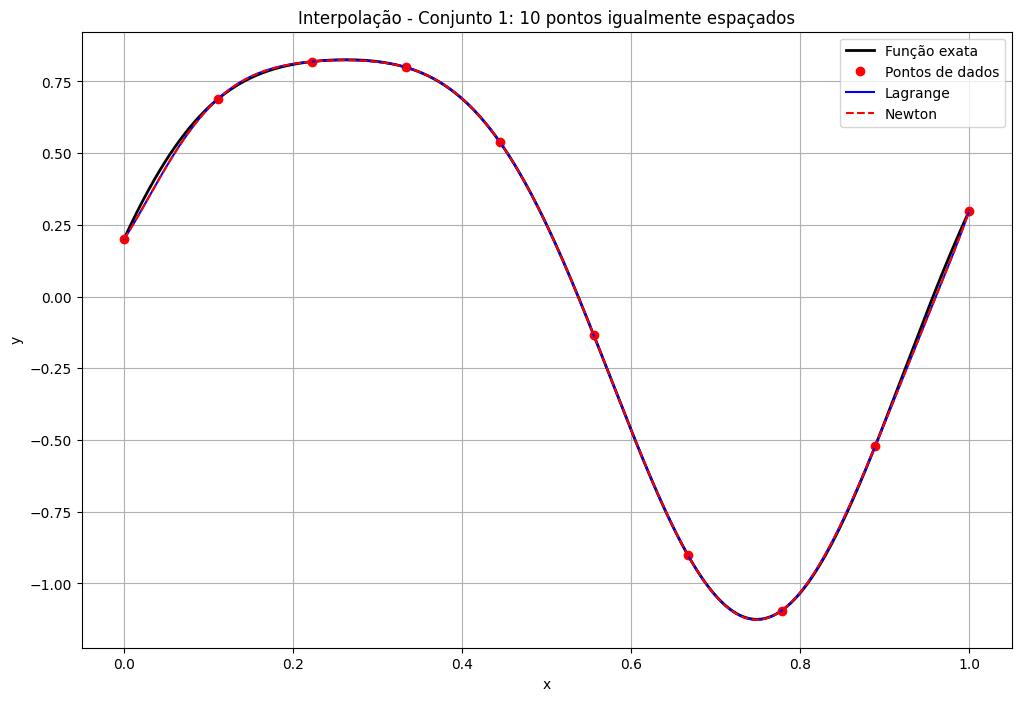

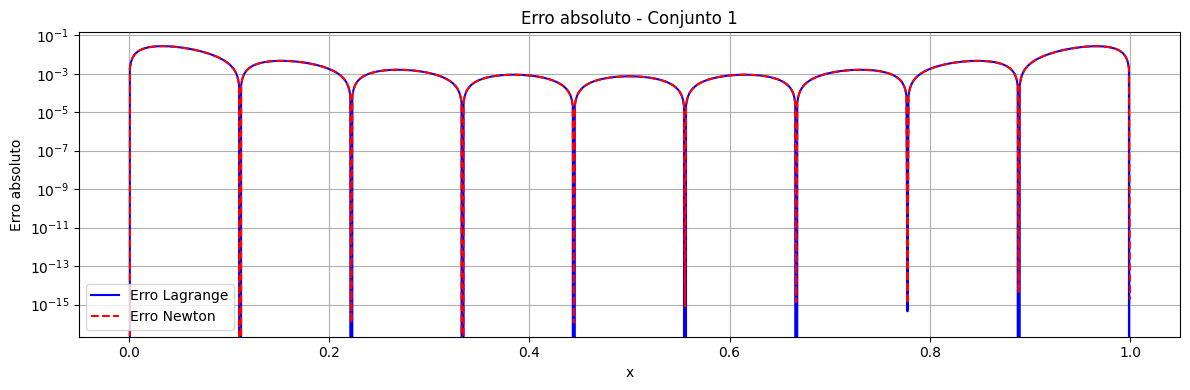

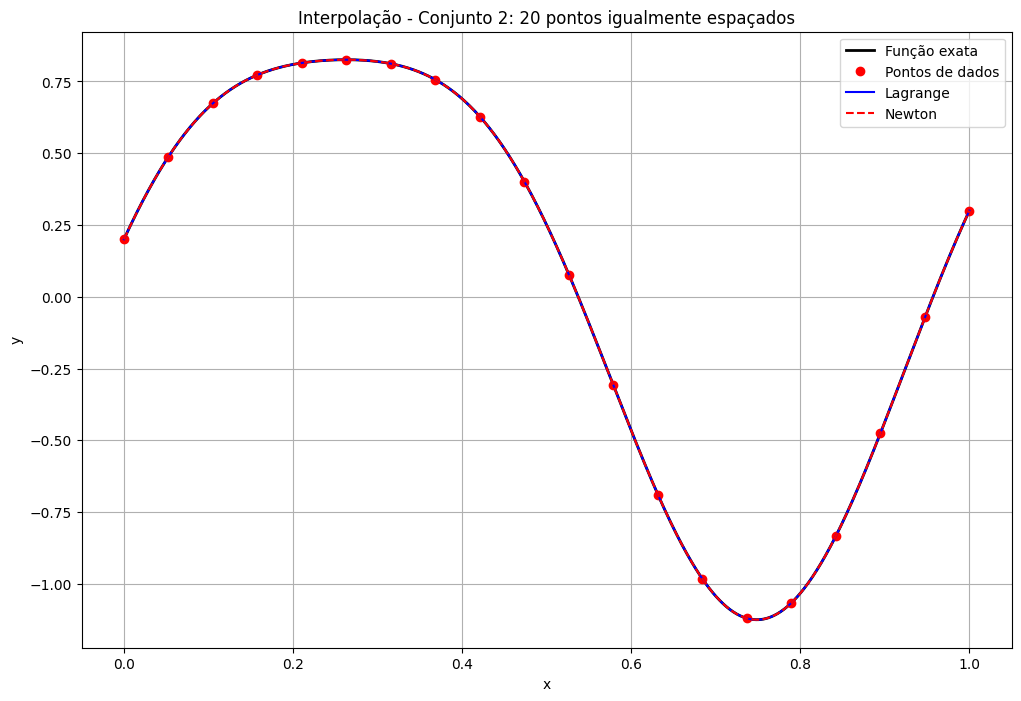

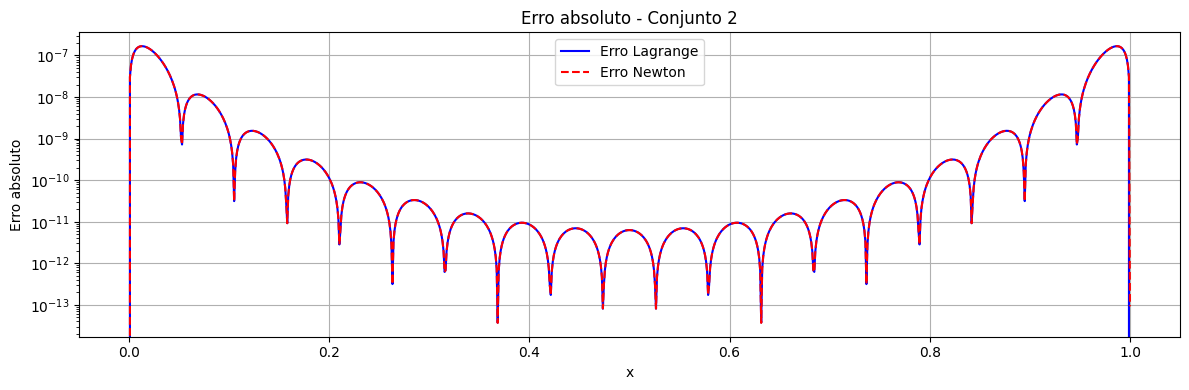

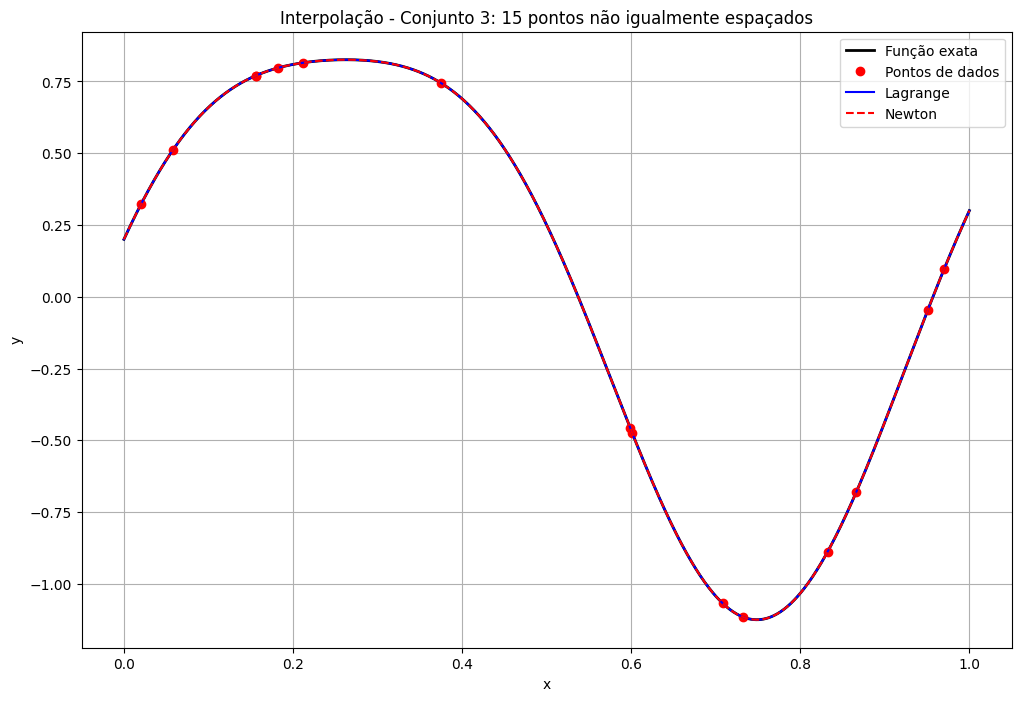

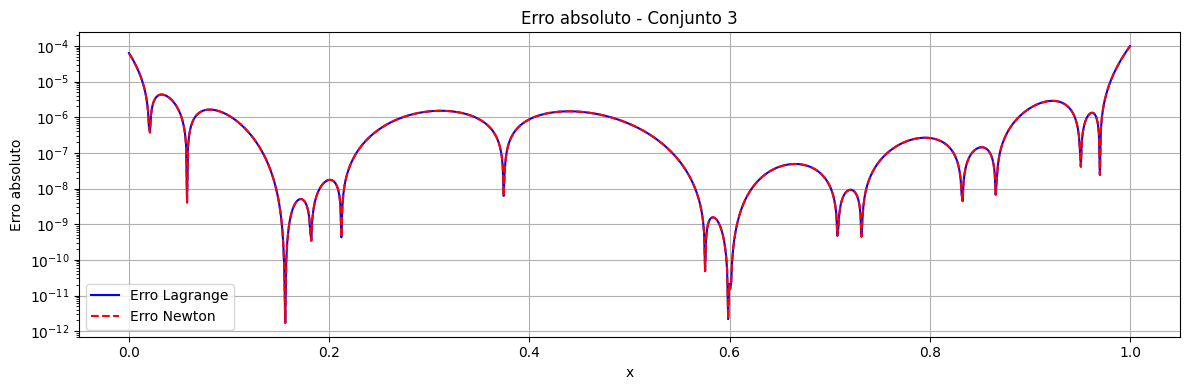

In [4]:
resultados, conjuntos, x_denso = analisar_interpolacao()
plt.show()  # Mostrar todos os gráficos